<a href="https://colab.research.google.com/github/Anjasfedo/Code-as-a-Cryptography/blob/main/elliptic_curve_el_gamal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
def curve_equation(x, p, a=1, b=6):
    """Elliptic curve equation y^2 = x^3 + ax + b mod p."""
    return (x**3 + a*x + b) % p

def is_curve_point(x, y, p=11):
    """Check if the point (x, y) satisfies the elliptic curve equation mod p."""
    return curve_equation(x, p=p) == (y**2) % p

# Point addition

In [135]:
def mod_inverse(a, p):
    """Returns the modular inverse of a under modulo p using Fermat's Little Theorem."""
    return pow(a, p - 2, p)

def calculate_slope_mod(P, Q, p, a):
    x1, y1 = P
    x2, y2 = Q
    if x1 == x2 and y1 == y2:
        # Use the formula for point doubling when P == Q
        numerator = (3 * x1**2 + a) % p
        denominator = (2 * y1) % p
    else:
        # Use the formula for regular slope when P != Q
        numerator = (y2 - y1) % p
        denominator = (x2 - x1) % p

    if denominator == 0:
        raise ValueError("Slope is undefined (denominator is zero).")

    # Compute the slope as (numerator / denominator) % p, which is
    # numerator * mod_inverse(denominator, p) % p
    slope = (numerator * mod_inverse(denominator, p)) % p
    return slope

In [136]:
def calculate_add_xr_mod(P, Q, m, p):
    x1, y1 = P
    x2, y2 = Q
    xr = (m**2 - x1 - x2) % p
    return xr

def calculate_add_yr_mod(P, Q, m, xr, p):
    x1, y1 = P
    x2, y2 = Q
    yr = (m * (x1 - xr) - y1) % p
    return yr

In [137]:
def calculate_point_add(P, Q, p, a):
  print(f'P: {P}')
  print(f'Q: {Q}')
  print(f'p: {p}')

  m = calculate_slope_mod(P, Q, p, a)
  print(f'slope: {m}')

  xr = calculate_add_xr_mod(P, Q, m, p)
  print(f'xr: {xr}')

  yr = calculate_add_yr_mod(P, Q, m, xr, p)
  print(f'yr: {yr}')

  R = (xr, yr)
  print(f'R: {R}')

  print(f'is R on curve: {is_curve_point(R[0], R[1], p)}')

  return R

# Point Doubling

In [138]:
def calculate_dob_xr_mod(P, Q, slope, p):
    x1, y1 = P
    x2, y2 = Q
    xr = (slope**2 - (2 * x1)) % p
    return xr

def calculate_dob_yr_mod(P, Q, slope, xr, p):
    x1, y1 = P
    yr = (slope * (x1 - xr) - y1) % p
    return yr

In [139]:
def calculate_point_dob(P, p, a):
  print(f'P: {P}')
  print(f'p: {p}')

  m = calculate_slope_mod(P, P, p, a)
  print(f'slope: {m}')

  xr = calculate_dob_xr_mod(P, P, m, p)
  print(f'xr: {xr}')

  yr = calculate_dob_yr_mod(P, P, m, xr, p)
  print(f'yr: {yr}')

  R = (xr, yr)
  print(f'R: {R}')

  print(f'is R on curve: {is_curve_point(R[0], R[1], p)}')

  return R

# Point Multiplication

In [140]:
def calculate_point_mul(P, k, p, a):
    # Initialize R to be the point at infinity, often represented as None in this context
    R = None
    Q = P  # Start with Q as P

    print(f'Initial P: {P}')
    print(f'Scalar k: {k}')
    print(f'p: {p}')
    print(f'a: {a}')

    # Double-and-add method
    while k > 0:
        if k % 2 == 1:  # If k is odd, add Q to the result
            if R is None:
                R = Q  # R is the point at infinity initially
            else:
                R = calculate_point_add(R, Q, p, a)
        Q = calculate_point_add(Q, Q, p, a)  # Double the point Q
        k //= 2  # Move to the next bit

    print(f'Final R after multiplication: {R}')
    print()
    return R


# Point Subtraction

In [141]:
def calculate_point_subtract(P, Q, p, a):
    # Find the inverse of point Q (x_Q, y_Q) -> (x_Q, -y_Q mod p)
    Q_inv = (Q[0], (-Q[1]) % p)

    print(f'P: {P}')
    print(f'Q: {Q}')
    print(f'Q_inv (inverse of Q): {Q_inv}')
    print(f'p: {p}')

    # Subtract P - Q by adding P and Q_inv
    R = calculate_point_add(P, Q_inv, p, a)

    print(f'R after subtraction (P - Q): {R}')
    return R


In [142]:
B = (2, 4)
p = 11
_a = 1

In [143]:
priv1 = 5
priv2 = 3

In [144]:
pub1 = calculate_point_mul(B, priv1, p, _a)
pub2 = calculate_point_mul(B, priv2, p, _a)

Initial P: (2, 4)
Scalar k: 5
p: 11
a: 1
P: (2, 4)
Q: (2, 4)
p: 11
slope: 3
xr: 5
yr: 9
R: (5, 9)
is R on curve: True
P: (5, 9)
Q: (5, 9)
p: 11
slope: 3
xr: 10
yr: 9
R: (10, 9)
is R on curve: True
P: (2, 4)
Q: (10, 9)
p: 11
slope: 2
xr: 3
yr: 5
R: (3, 5)
is R on curve: True
P: (10, 9)
Q: (10, 9)
p: 11
slope: 10
xr: 3
yr: 6
R: (3, 6)
is R on curve: True
Final R after multiplication: (3, 5)

Initial P: (2, 4)
Scalar k: 3
p: 11
a: 1
P: (2, 4)
Q: (2, 4)
p: 11
slope: 3
xr: 5
yr: 9
R: (5, 9)
is R on curve: True
P: (2, 4)
Q: (5, 9)
p: 11
slope: 9
xr: 8
yr: 8
R: (8, 8)
is R on curve: True
P: (5, 9)
Q: (5, 9)
p: 11
slope: 3
xr: 10
yr: 9
R: (10, 9)
is R on curve: True
Final R after multiplication: (8, 8)



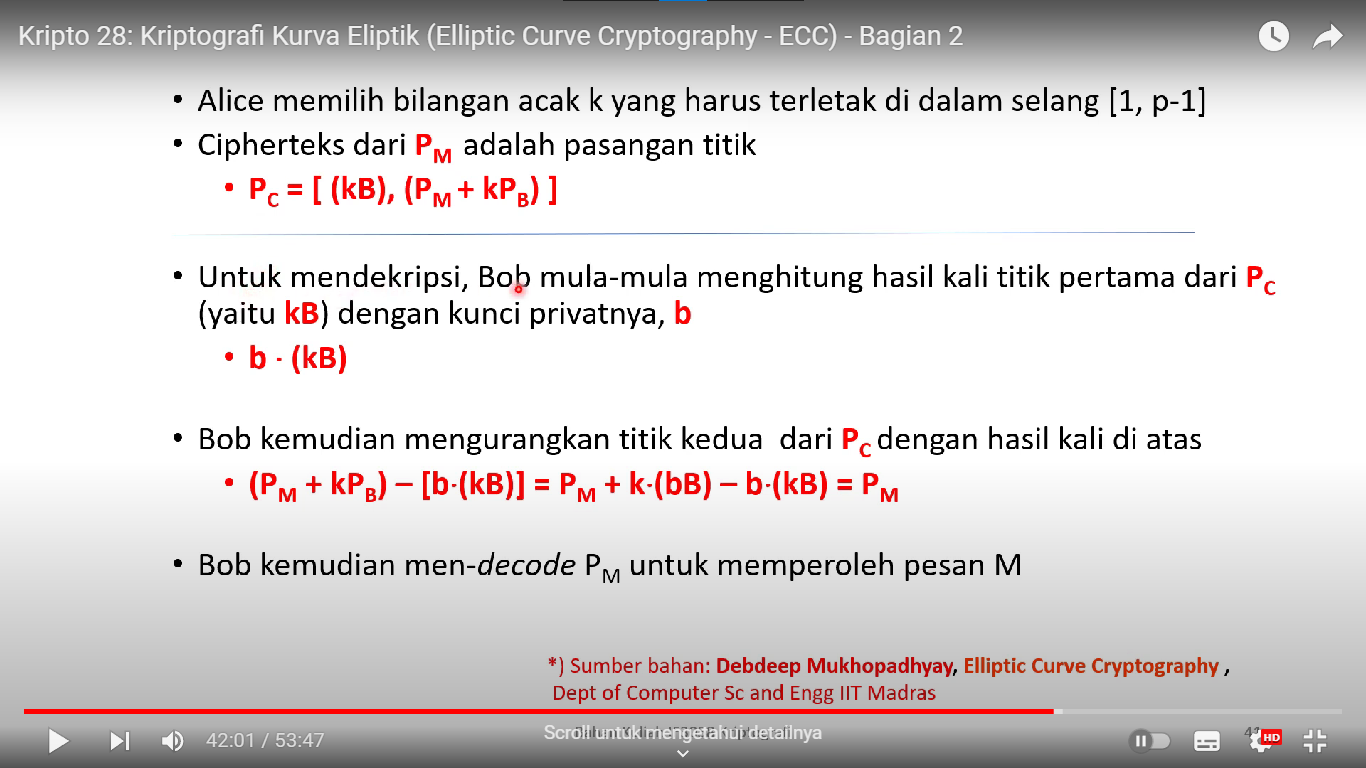

In [ ]:
# Pm: message
# p: primary number
# Pb: public key 2
# b: private key 2
# k: random number, 1 < k < p < - 1

In [145]:
# encryption

k = 7 # random number 1 < k < p - 1 / 1 till 10
message = (8, 8) # certain point on elliptic curve that represent the number that also represent character

# k*b
C1 = calculate_point_mul(B, k, p, _a)

# Pm + k * Pb
C2 = calculate_point_add(message, calculate_point_mul(pub2, k, p, _a), p, _a)

cipher = (C1, C2)
print(f'Cipher: {cipher}')

Initial P: (2, 4)
Scalar k: 7
p: 11
a: 1
P: (2, 4)
Q: (2, 4)
p: 11
slope: 3
xr: 5
yr: 9
R: (5, 9)
is R on curve: True
P: (2, 4)
Q: (5, 9)
p: 11
slope: 9
xr: 8
yr: 8
R: (8, 8)
is R on curve: True
P: (5, 9)
Q: (5, 9)
p: 11
slope: 3
xr: 10
yr: 9
R: (10, 9)
is R on curve: True
P: (8, 8)
Q: (10, 9)
p: 11
slope: 6
xr: 7
yr: 9
R: (7, 9)
is R on curve: True
P: (10, 9)
Q: (10, 9)
p: 11
slope: 10
xr: 3
yr: 6
R: (3, 6)
is R on curve: True
Final R after multiplication: (7, 9)

Initial P: (8, 8)
Scalar k: 7
p: 11
a: 1
P: (8, 8)
Q: (8, 8)
p: 11
slope: 10
xr: 7
yr: 2
R: (7, 2)
is R on curve: True
P: (8, 8)
Q: (7, 2)
p: 11
slope: 6
xr: 10
yr: 2
R: (10, 2)
is R on curve: True
P: (7, 2)
Q: (7, 2)
p: 11
slope: 4
xr: 2
yr: 7
R: (2, 7)
is R on curve: True
P: (10, 2)
Q: (2, 7)
p: 11
slope: 9
xr: 3
yr: 6
R: (3, 6)
is R on curve: True
P: (2, 7)
Q: (2, 7)
p: 11
slope: 8
xr: 5
yr: 2
R: (5, 2)
is R on curve: True
Final R after multiplication: (3, 6)

P: (8, 8)
Q: (3, 6)
p: 11
slope: 7
xr: 5
yr: 2
R: (5, 2)
is R 

In [146]:
# decryption

# kb = C1

# b * Kb - C2
# or
# b * C1 - C2

_p = calculate_point_mul(C1, priv2, p, _a)

plain = calculate_point_subtract(C2, _p, p, _a)

Initial P: (7, 9)
Scalar k: 3
p: 11
a: 1
P: (7, 9)
Q: (7, 9)
p: 11
slope: 7
xr: 2
yr: 4
R: (2, 4)
is R on curve: True
P: (7, 9)
Q: (2, 4)
p: 11
slope: 1
xr: 3
yr: 6
R: (3, 6)
is R on curve: True
P: (2, 4)
Q: (2, 4)
p: 11
slope: 3
xr: 5
yr: 9
R: (5, 9)
is R on curve: True
Final R after multiplication: (3, 6)

P: (5, 2)
Q: (3, 6)
Q_inv (inverse of Q): (3, 5)
p: 11
P: (5, 2)
Q: (3, 5)
p: 11
slope: 4
xr: 8
yr: 8
R: (8, 8)
is R on curve: True
R after subtraction (P - Q): (8, 8)


In [147]:
print(f"Plain: {message}")
print(f'Cipher: {cipher}')
print(f'Decrypted Message: {plain}')

Plain: (8, 8)
Cipher: ((7, 9), (5, 2))
Decrypted Message: (8, 8)
